#CENG474 PROJECT
**Copyright (C) 2024**
Burak Geçer(@burakgecer)

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

#Import Libraries & Dataset

##Import Libraries
The libraries to be used in most lines of the entire project have been imported generally.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import Dataset

At first, import dataset in csv format by pandas library and read_csv method.

In [ ]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = pd.DataFrame(dataset)

#Data Informations


##Name of Columns
Before any processing is performed, the feature names in the raw form of the dataset are as shown below.

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

##Shape of Data

In [ ]:
df.shape

(5110, 12)

#Check Datas

##The first 5 features in the dataset.

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##The last 5 features in the dataset.

In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


##Statistical Measures

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##Number of NaN values.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##Type of each feature.

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

##Info about each future
type,non-null count, column number, memory usage


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##Number of Unique values.

In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#Visualization and Plots

In [ ]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

##Cat Plot


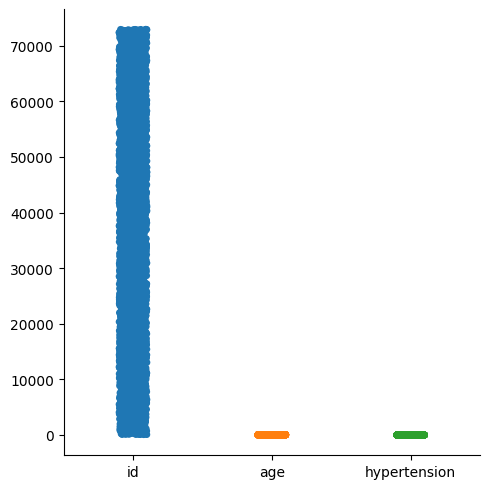

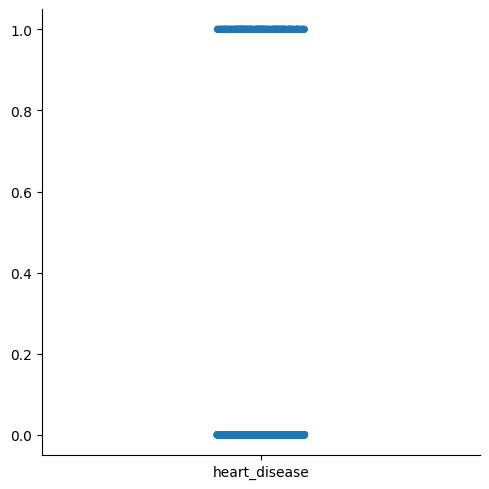

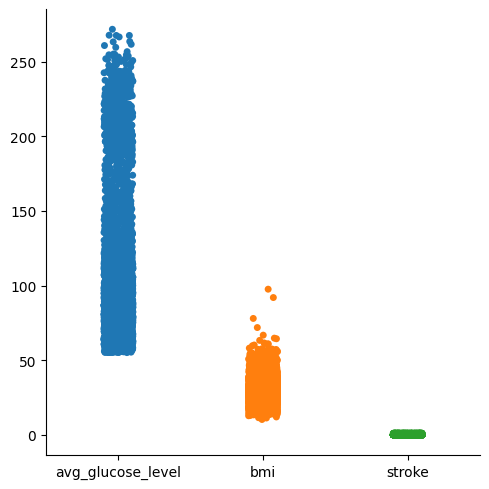

In [ ]:
sns.catplot(df.iloc[:, 0:4])
sns.catplot(df.iloc[:, 4:8])
sns.catplot(df.iloc[:, 8:12])

##Box Plot


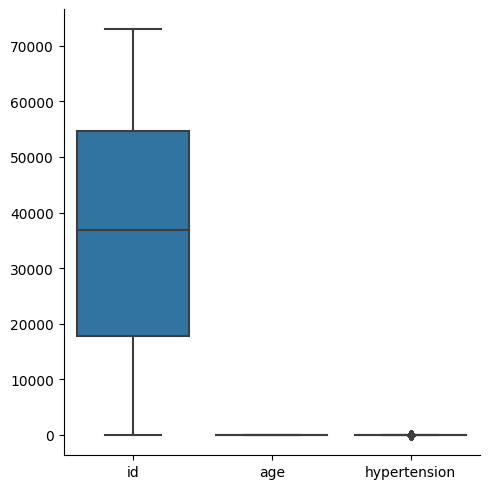

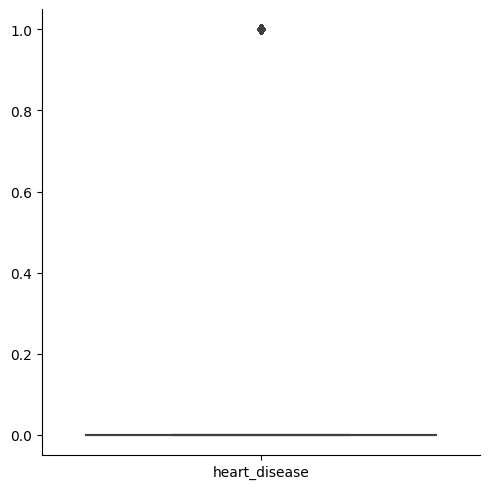

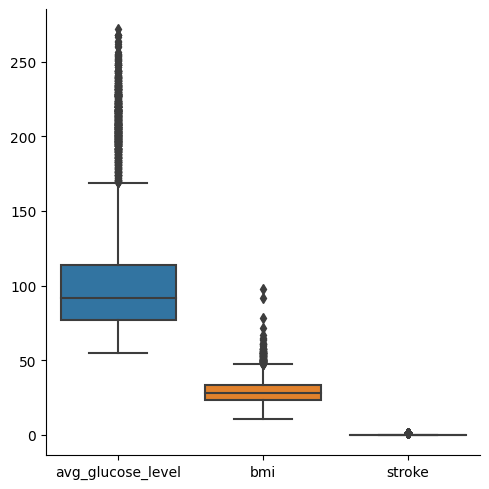

In [ ]:
sns.catplot(df.iloc[:, 0:4],kind="box")
sns.catplot(df.iloc[:, 4:8],kind="box")
sns.catplot(df.iloc[:, 8:12],kind="box")

##Pair Plot

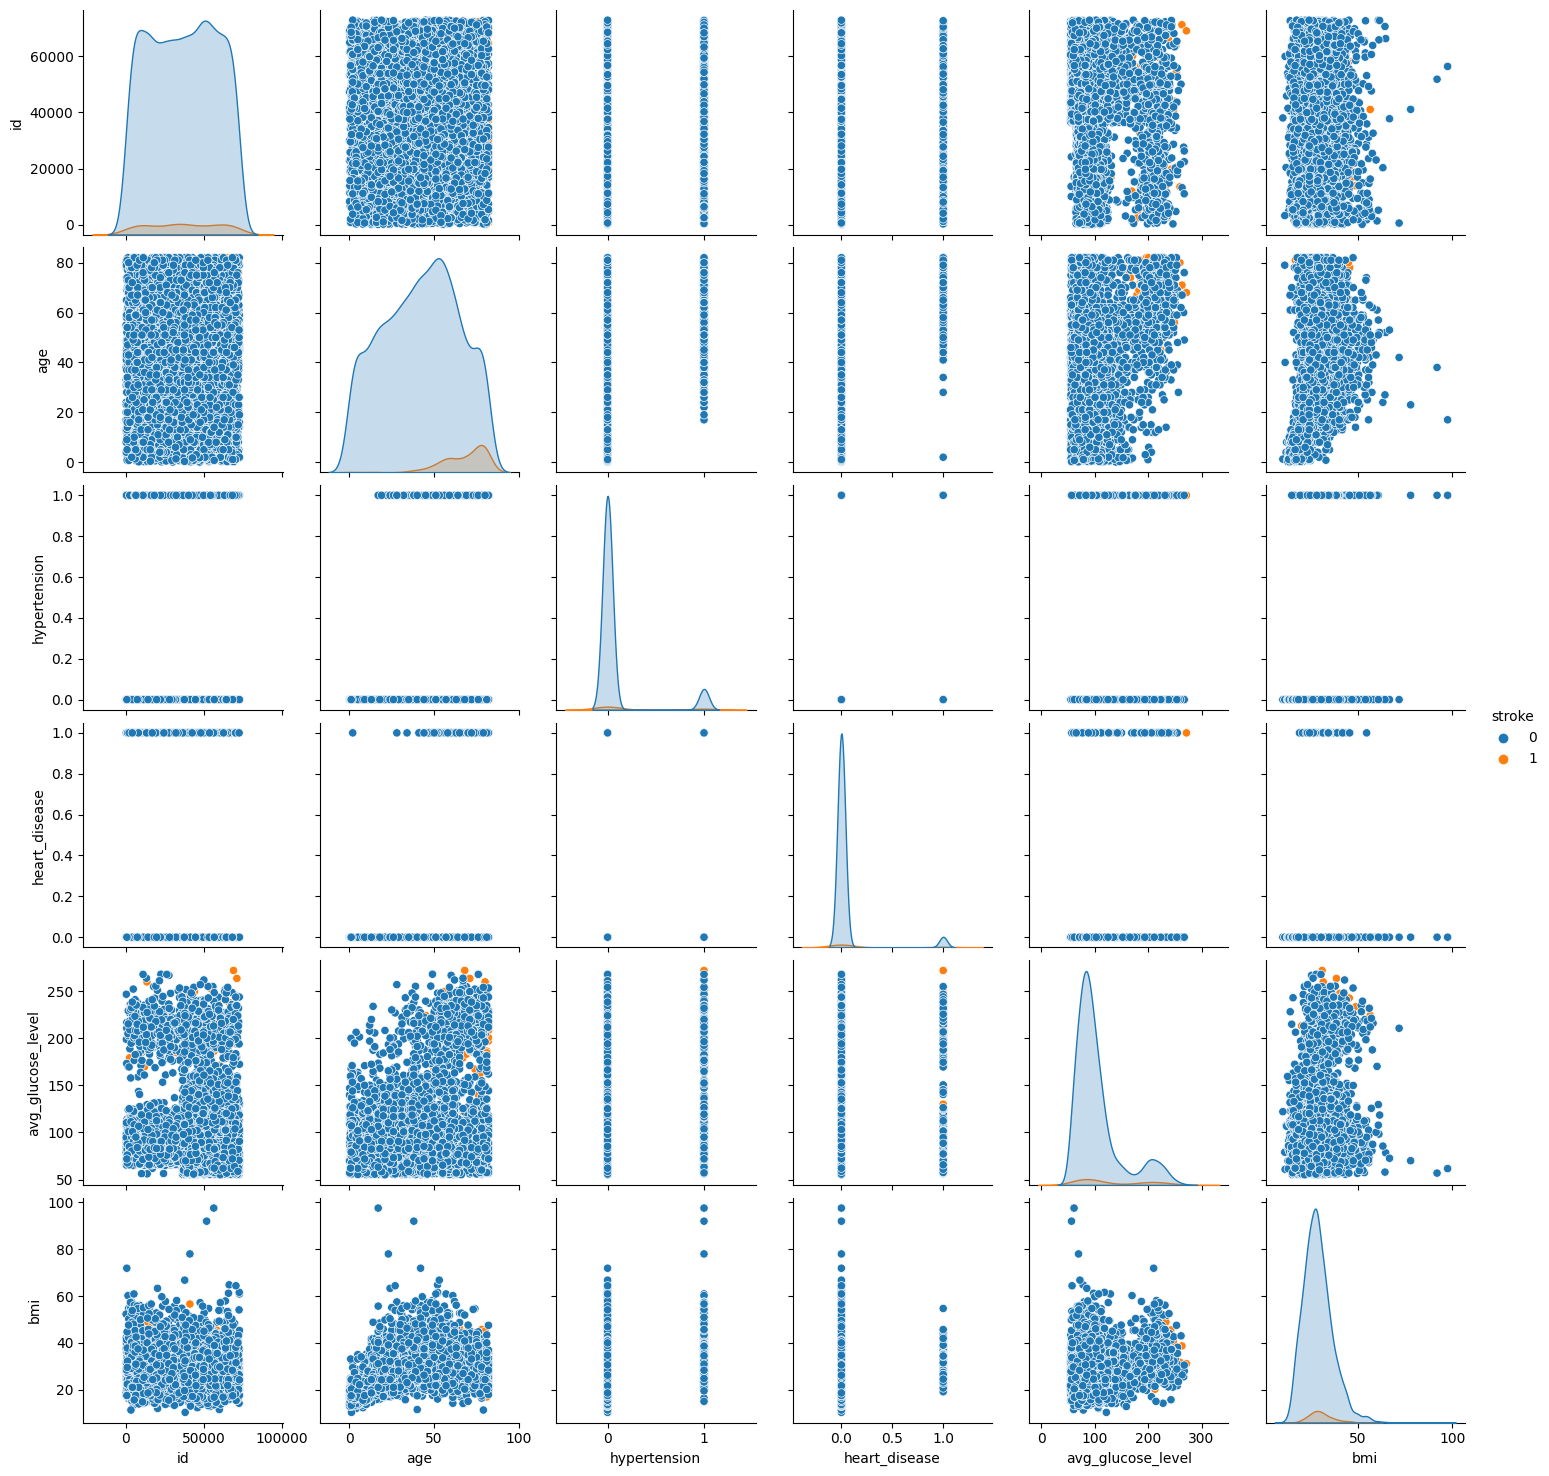

In [ ]:
sns.pairplot(df, hue = "stroke", diag_kind = "kde")
plt.show()
#Reference: https://github.com/SeyitKoyuncu/Heart-Attack-Prediction/blob/main/HeartAttackPrediction.ipynb

##Heat Map


<Axes: >

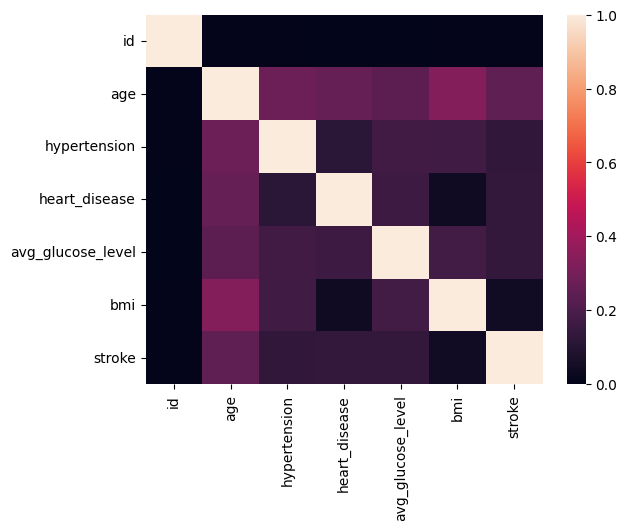

In [ ]:
corelation=df.corr(numeric_only= True)
sns.heatmap(corelation)

##Numerical Datas Plot

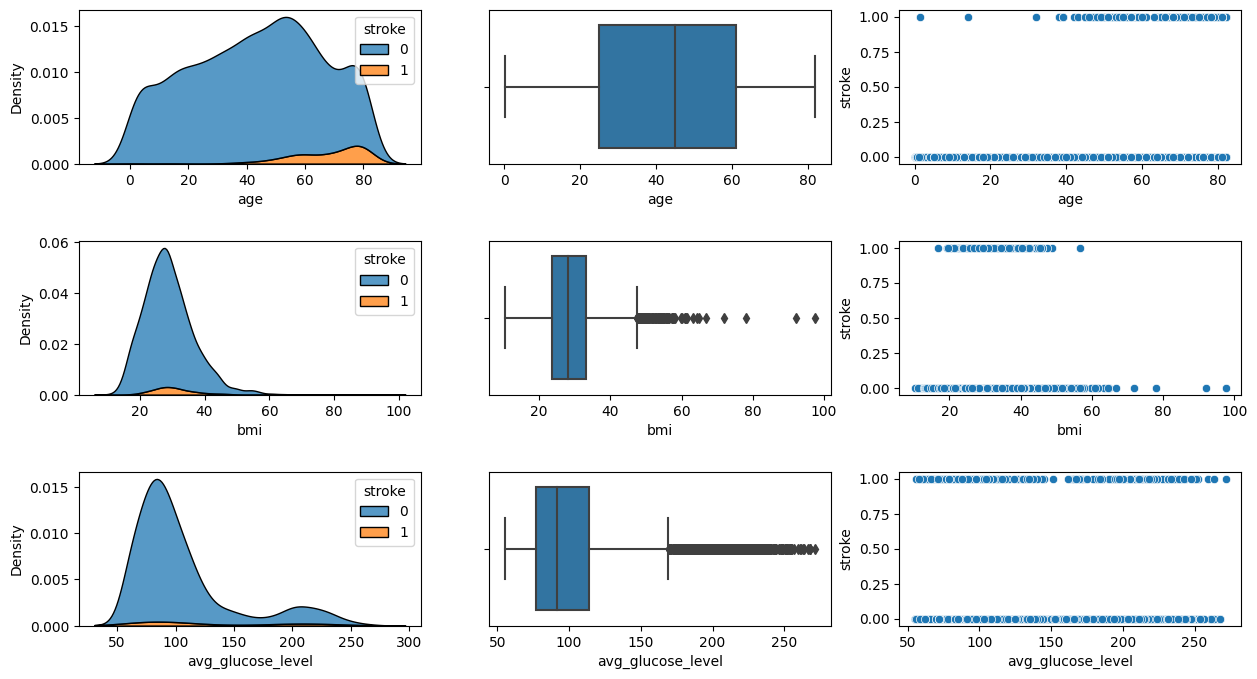

In [ ]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=df, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=df, ax=ax[i, 2])
    i+=1
plt.show()
#Reference: https://www.kaggle.com/code/nimapourmoradi/healthcare-stroke

##Categorical Datas Plot

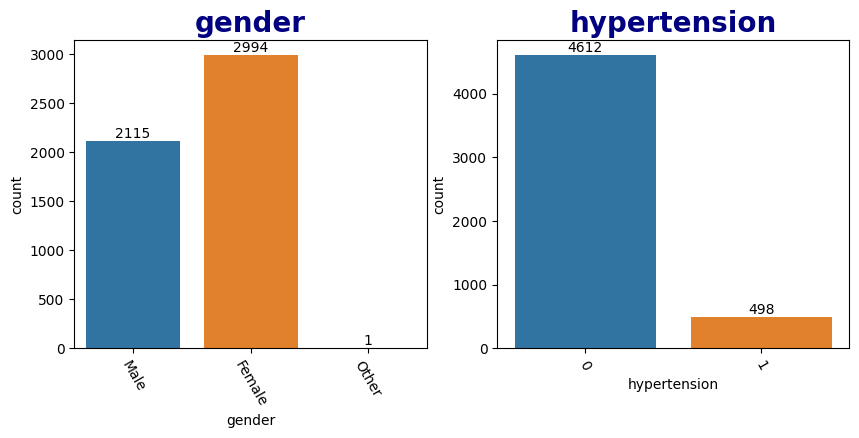

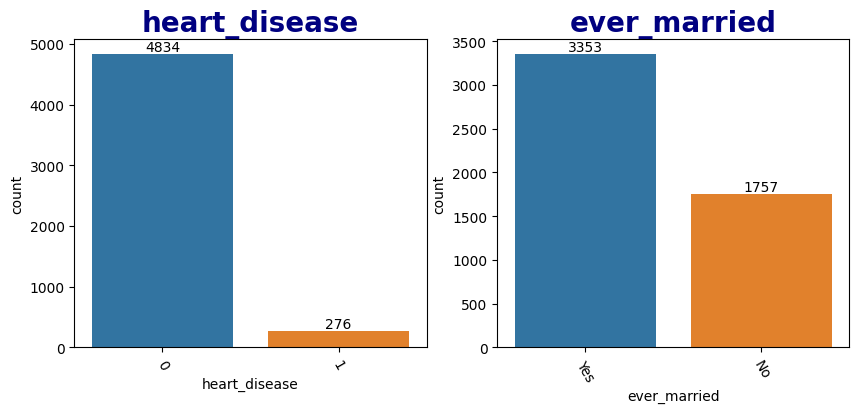

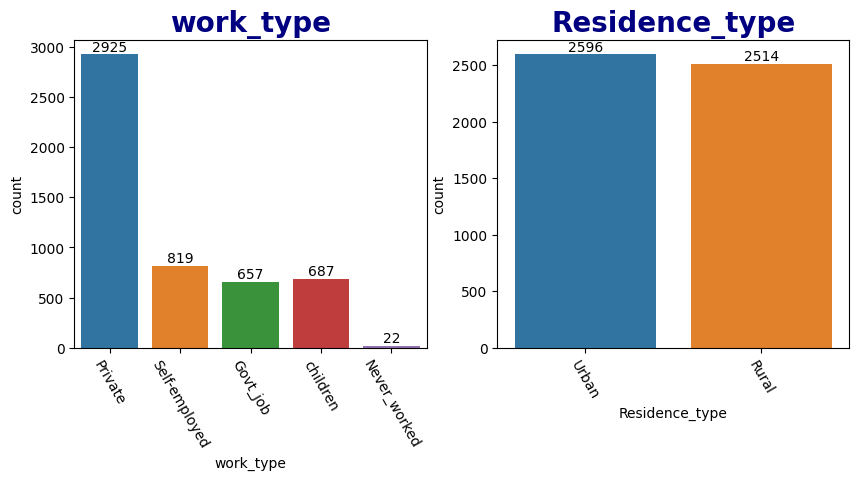

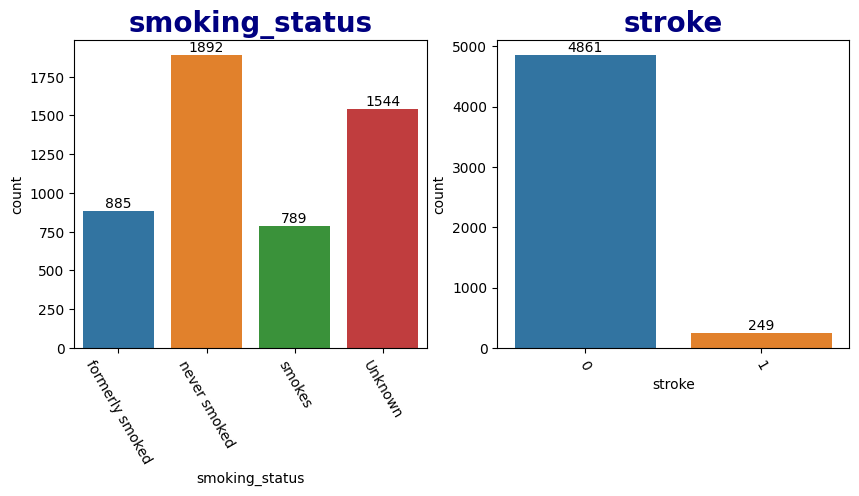

In [ ]:
i=0
while i<8 :

    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1

    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

    #Reference: https://www.kaggle.com/code/nimapourmoradi/healthcare-stroke

##Pie Chart

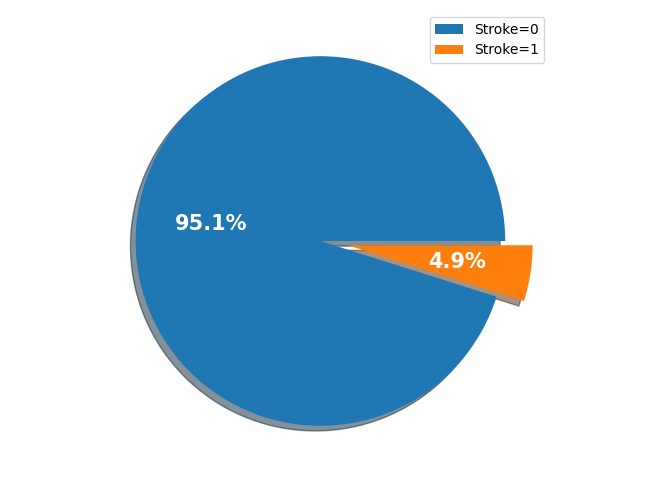

In [ ]:
x = df['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()
#Reference: https://www.kaggle.com/code/nimapourmoradi/healthcare-stroke

#Data Cleaning

##Dropping Unique Values

Since feature "id" is all unique. We can drop this feature.

In [ ]:
df.drop("id", axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###**Dropping different gender value**

According to the information provided on the website from which we obtained the dataset, the gender feature includes samples labeled as Male, Female, and Other. Due to the presence of only one instance of "Other," we are dropping this row to maintain a homogeneous distribution.

In [ ]:
def otherCount():
  genderCounts = df["gender"].value_counts()
  if "Other" in genderCounts.index:
    numOther = genderCounts["Other"]
    print(f"Number of 'other': {numOther}")
  else:
    print("'Other' appears zero times in the 'gender' column.")
otherCount()

Number of 'other': 1


In [ ]:
other_rows = df[df['gender'] == 'Other']
other_rows

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [ ]:
otherCount()

'Other' appears zero times in the 'gender' column.


##Noisy Data

###**Dealing with noisy Age values.**

Since our age values contain numbers like 1.2, 1.6, etc., we dealt with these data by rounding them.

In [ ]:
df["age"] = df["age"].round()

##Missing Values

###**Dealing with missing values.**

When filling NaN values for the BMI (Body Mass Index) feature, we opted not to directly take the overall average of all BMI values. Instead, we divided the ages into groups with a step size of 10. We calculated the mean BMI for each group individually. Subsequently, when assigning NaN values, we considered the BMI average of the corresponding age group. This approach allowed us to fill NaN values in the BMI feature of our dataset in a meaningful way

In [ ]:
age_steps = [0, 10, 20, 30, 40, 50, 60, 70, 80,90,100]

df['age_group'] = pd.cut(df['age'], bins=age_steps, right=False)

for group in df['age_group'].unique():
    group_mean = df[df['age_group'] == group]['bmi'].mean()
    df.loc[df['age_group'] == group, 'bmi'] = df.loc[df['age_group'] == group, 'bmi'].fillna(group_mean)

df.drop(['age_group'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##Outlier Values
Based on our research, we observed that it is nearly impossible for an individual with an obesity level of obese-III to have a BMI level of 70 or higher. Therefore, instead of dropping all outliers, we specifically dropped samples with a BMI value of 70 and above.

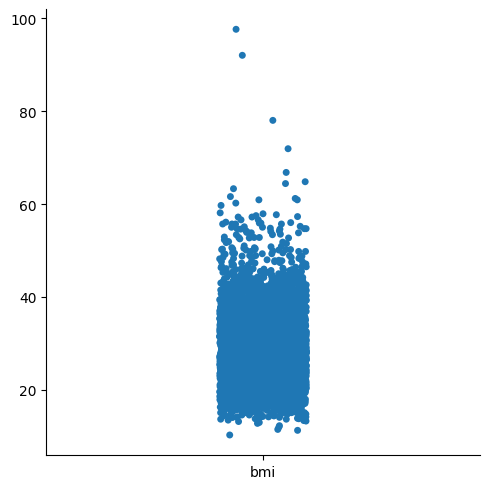

In [ ]:
sns.catplot(df.iloc[:, 8:9])


In [ ]:
df_filtered = df.query('bmi > 70')
df_filtered


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [ ]:
df.drop(df[df['bmi'] > 70].index, inplace=True)

#Data Transformation

##Binary Encoding

The features Gender, ever_married, and Residence_type have two distinct attributes each. Therefore, to simplify and standardize these features, we are applying Binary Encoding, transforming them into 0s and 1s.

In [ ]:
df["gender"] = (df["gender"] == "Male").astype(int)
df["ever_married"] = (df["ever_married"] == "Yes").astype(int)
df["Residence_type"] = (df["Residence_type"] == "Urban").astype(int)

##One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['smoking_status','work_type'])
df.head()

#Reference: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,31.004068,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0


In [ ]:
df.to_csv("df.csv", index=False)

#Dimensionality Reduction

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

##Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

'''
score_func = Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores.
Default is f_classif (see below “See Also”). The default function only works with classification tasks.

k = Number of top features to select. The “all” option bypasses selection, for use in a parameter search.
'''

KBest = SelectKBest(score_func = chi2, k = 12)
fit = KBest.fit(X, y)
fit_scores = fit.scores_

features = fit.transform(X)
print(fit_scores)

[2.53671624e-01 3.62979892e+03 7.62823741e+01 8.78367424e+01
 2.05704657e+01 5.89828054e-01 1.71870635e+03 2.02605469e+01
 1.11562992e+01 1.76194827e+01 5.44990033e-02 3.47570636e-01
 2.98793513e-02 1.12808896e+00 3.19089436e-01 1.65172756e+01
 3.11475268e+01]


###Feature Elimination Random Forest Classifier SMOTE
A comparison was conducted after eliminating features with a score below 1, and the result was compared with a Random Forest Classifier - SMOTE example, which yielded an accuracy of 0.96. The comparison revealed that our accuracy decreased to 0.93. Consequently, for future applications, it was decided to proceed without eliminating these features.

In [ ]:
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed','work_type_children',]


feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': fit_scores})


feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)


print(feature_scores_df)

                           Feature        Score
1                              age  3629.798924
6                avg_glucose_level  1718.706354
3                    heart_disease    87.836742
2                     hypertension    76.282374
16              work_type_children    31.147527
4                     ever_married    20.570466
7                              bmi    20.260547
9   smoking_status_formerly smoked    17.619483
15         work_type_Self-employed    16.517276
8           smoking_status_Unknown    11.156299
13          work_type_Never_worked     1.128089
5                   Residence_type     0.589828
11           smoking_status_smokes     0.347571
14               work_type_Private     0.319089
0                           gender     0.253672
10     smoking_status_never smoked     0.054499
12              work_type_Govt_job     0.029879


In [ ]:
selected_features = feature_scores_df[feature_scores_df['Score'] >= 1]


df_v2 = X[selected_features['Feature'].values]


df_v2



,age,avg_glucose_level,heart_disease,hypertension,work_type_children,ever_married,bmi,smoking_status_formerly smoked,work_type_Self-employed,smoking_status_Unknown,work_type_Never_worked
0,67.0,228.69,1,0,0,1,36.600000,1,0,0,0
1,61.0,202.21,0,0,0,1,31.004068,0,1,0,0
2,80.0,105.92,1,0,0,1,32.500000,0,0,0,0
3,49.0,171.23,0,0,0,1,34.400000,0,0,0,0
4,79.0,174.12,0,1,0,1,24.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,0,1,0,1,28.281319,0,0,0,0
5106,81.0,125.20,0,0,0,1,40.000000,0,1,0,0
5107,35.0,82.99,0,0,0,1,30.600000,0,1,0,0
5108,51.0,166.29,0,0,0,1,25.600000,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from imblearn.over_sampling import SMOTE
sm_v2 = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X_v2, oversampled_Y_v2 = sm_v2.fit_resample(df_v2, df['stroke'])
X_train_SMOTE_v2, X_test_SMOTE_v2, y_train_SMOTE_v2, y_test_SMOTE_v2 = train_test_split(oversampled_X_v2, oversampled_Y_v2, random_state=0, test_size=0.25)
#Reference for SMOTE: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html,https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote

In [ ]:

def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    plt.show()

0.9279242174629324


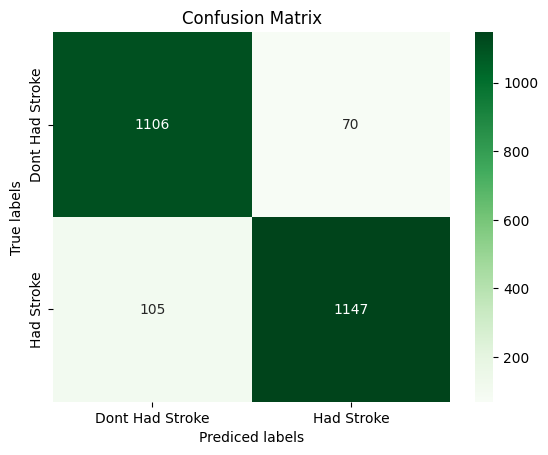

In [ ]:
rfc_v2 = RandomForestClassifier(n_estimators=200,n_jobs=-1)
rfc_v2.fit(X_train_SMOTE_v2, y_train_SMOTE_v2)
y_pred_SMOTE_v2 = rfc_v2.predict(X_test_SMOTE_v2)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_SMOTE_v2,y_test_SMOTE_v2))
rfc_SMOTE_score_v2 = accuracy_score(y_pred_SMOTE_v2,y_test_SMOTE_v2)
plot_confusion_matrix(y_pred_SMOTE_v2,y_test_SMOTE_v2)

##Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
KBest2 = SelectKBest(score_func = mutual_info_classif, k = 10)

fit2 = KBest2.fit(X,y)
fit_scores2 = fit2.scores_

features2 = fit2.transform(X)
print(fit_scores2)

[0.00166654 0.03904507 0.01059727 0.00780309 0.00681473 0.00499045
 0.00565855 0.01288591 0.0017758  0.00318214 0.00221096 0.00217159
 0.00181492 0.         0.0011937  0.00240661 0.00475973]


#Model Algorithms

##Define Confusion matrix

In [ ]:

def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    plt.show()

##Train Test Split

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_resampled_ros, y_resampled_ros, test_size=0.25, random_state=42)

#Min-Max Scaler
scaler = MinMaxScaler().fit_transform(X)
X_minmax = pd.DataFrame(scaler, columns=X.columns)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_resampled_ros, y_resampled_ros, random_state=0, test_size=0.25)
#Reference for Min-Max Scaler: https://www.kaggle.com/code/nimapourmoradi/healthcare-stroke

#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('stroke', axis=1), df['stroke'])
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(oversampled_X, oversampled_Y, random_state=0, test_size=0.25)
#Reference for SMOTE: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html,https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote


##Importing sklearn libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

##**Random Forest Classifier**

###RandomForestClassifier with Random Over Sampler

0.9942339373970346


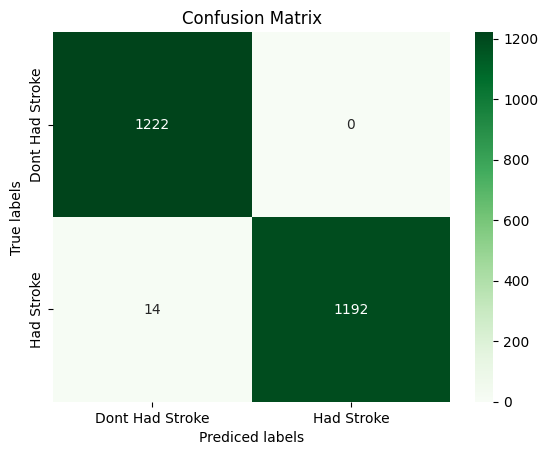

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1)
rfc.fit(X_train_ros, y_train_ros)
y_pred_ros = rfc.predict(X_test_ros)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_ros,y_test_ros))
rfc_ros_score = accuracy_score(y_pred_ros,y_test_ros)
plot_confusion_matrix(y_pred_ros,y_test_ros)

In [ ]:
rfc_ros = metrics.classification_report(y_test_ros, y_pred_ros)
print(rfc_ros)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1236
           1       0.99      1.00      0.99      1192

    accuracy                           0.99      2428
   macro avg       0.99      0.99      0.99      2428
weighted avg       0.99      0.99      0.99      2428



###RandomForestClassifier with Min-Max Scaler

0.9880560131795717


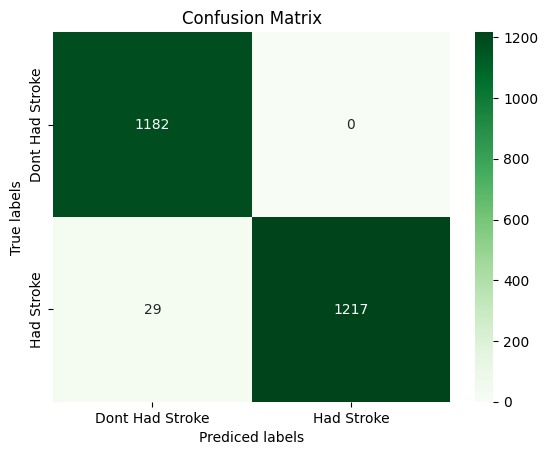

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1)
rfc.fit(X_train_minmax, y_train_minmax)
y_pred_minmax = rfc.predict(X_test_minmax)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_minmax,y_test_minmax))
rfc_minmax_score = accuracy_score(y_pred_minmax,y_test_minmax)
plot_confusion_matrix(y_pred_minmax,y_test_minmax)

In [ ]:
rfc_minmax = metrics.classification_report(y_test_minmax, y_pred_minmax)
print(rfc_minmax)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1211
           1       0.98      1.00      0.99      1217

    accuracy                           0.99      2428
   macro avg       0.99      0.99      0.99      2428
weighted avg       0.99      0.99      0.99      2428



###RandomForestClassifier with SMOTE

0.9670510708401977


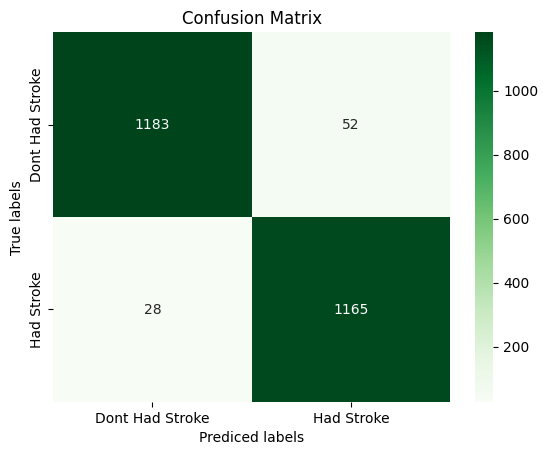

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1)
rfc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE = rfc.predict(X_test_SMOTE)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_SMOTE,y_test_SMOTE))
rfc_SMOTE_score = accuracy_score(y_pred_SMOTE,y_test_SMOTE)
plot_confusion_matrix(y_pred_SMOTE,y_test_SMOTE)

In [ ]:
rfc_SMOTE = metrics.classification_report(y_test_SMOTE, y_pred_SMOTE)
print(rfc_SMOTE)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1211
           1       0.98      0.96      0.97      1217

    accuracy                           0.97      2428
   macro avg       0.97      0.97      0.97      2428
weighted avg       0.97      0.97      0.97      2428



In [ ]:
from time import time
start = time()
rfc.fit(X_train_SMOTE, y_train_SMOTE)
train_time = time() - start
start = time()
y_pred = rfc.predict(X_test_SMOTE)
predict_time = time()-start
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)

	Training time: 1.340s
	Prediction time: 0.097s


##Supported Vector Clasifier

###Supported Vector Clasifier with Random Over Sampler

0.7014003294892917


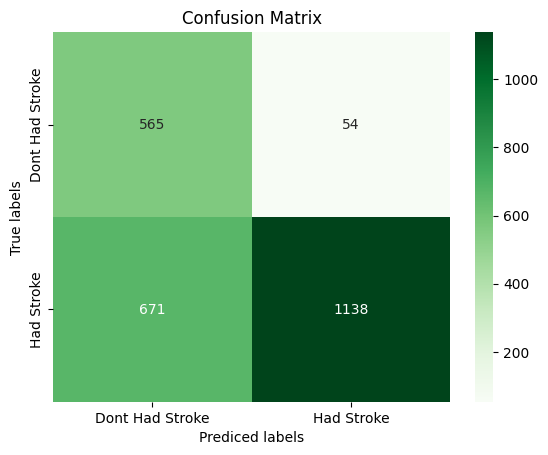

In [ ]:
svc = SVC(C=0.001, gamma=0.001)
svc.fit(X_train_ros, y_train_ros)
y_pred_ros = svc.predict(X_test_ros)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_ros,y_test_ros))
svc_score_ros = accuracy_score(y_pred_ros,y_test_ros)
plot_confusion_matrix(y_pred_ros,y_test_ros)

In [ ]:
svm_ros = metrics.classification_report(y_test_ros, y_pred_ros)
print(svm_ros)

              precision    recall  f1-score   support

           0       0.91      0.46      0.61      1236
           1       0.63      0.95      0.76      1192

    accuracy                           0.70      2428
   macro avg       0.77      0.71      0.68      2428
weighted avg       0.77      0.70      0.68      2428



###Supported Vector Clasifier with Min-Max Scaler

0.7660626029654036


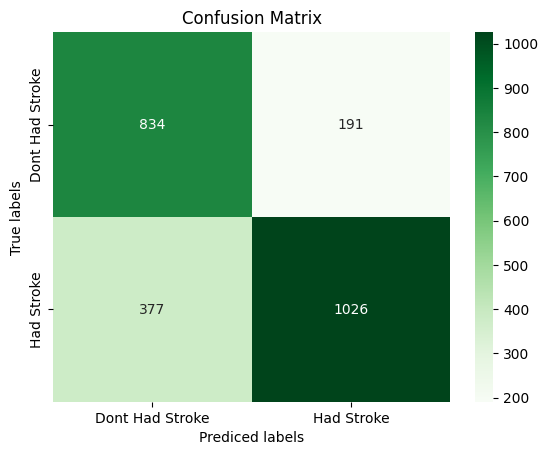

In [ ]:
svc = SVC(C=0.001, gamma=0.001)
svc.fit(X_train_minmax, y_train_minmax)
y_pred_minmax = svc.predict(X_test_minmax)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_minmax,y_test_minmax))
svc_score_minmax = accuracy_score(y_pred_minmax,y_test_minmax)
plot_confusion_matrix(y_pred_minmax,y_test_minmax)

In [ ]:
svm_minmax = metrics.classification_report(y_test_minmax, y_pred_minmax)
print(svm_minmax)

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1211
           1       0.73      0.84      0.78      1217

    accuracy                           0.77      2428
   macro avg       0.77      0.77      0.76      2428
weighted avg       0.77      0.77      0.76      2428



###Supported Vector Clasifier SMOTE

0.7561779242174629


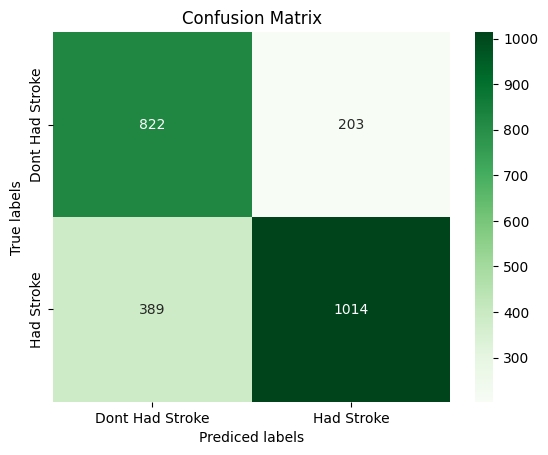

In [ ]:
svc = SVC(C=0.001, gamma=0.001)
svc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE = svc.predict(X_test_SMOTE)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_SMOTE,y_test_SMOTE))
svc_score_SMOTE = accuracy_score(y_pred_SMOTE,y_test_SMOTE)
plot_confusion_matrix(y_pred_SMOTE,y_test_SMOTE)

In [ ]:
svm_SMOTE = metrics.classification_report(y_test_minmax, y_pred_minmax)
print(svm_SMOTE)

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1211
           1       0.73      0.84      0.78      1217

    accuracy                           0.77      2428
   macro avg       0.77      0.77      0.76      2428
weighted avg       0.77      0.77      0.76      2428



In [ ]:
from time import time


start = time()
# Model :
svc = SVC(C=0.001, gamma=0.001)
svc.fit(X_train_SMOTE, y_train_SMOTE)
train_time = time() - start
start = time()
print("\tTraining time: %0.3fs" % train_time)

	Training time: 3.155s


##Decision Tree Classifier

###DecisionTreeClassifier Hyper Parameter Tuning with Random Over Sampler

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree_ros = DecisionTreeClassifier()
tree_cv_ros = GridSearchCV(estimator=tree_ros, cv=10, param_grid=parameters).fit(X_train_ros, y_train_ros)



print('Tuned hyper parameters : ', tree_cv_ros.best_params_)
print('accuracy : ', tree_cv_ros.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_depth': 22, 'splitter': 'best'}
accuracy :  0.9703451212710472


In [ ]:
tree_ros = DecisionTreeClassifier(**tree_cv_ros.best_params_).fit(X_train_ros, y_train_ros)
y_pred_tree_ros = tree_ros.predict(X_test_ros)

tree_score_ros = round(tree_ros.score(X_test_ros, y_test_ros), 3)
print('DecisionTreeClassifier Score : ', tree_score_ros)

DecisionTreeClassifier Score :  0.97


In [ ]:
dtc_ros = metrics.classification_report(y_test_ros, y_pred_tree_ros)
print(dtc_ros)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1236
           1       0.94      1.00      0.97      1192

    accuracy                           0.97      2428
   macro avg       0.97      0.97      0.97      2428
weighted avg       0.97      0.97      0.97      2428



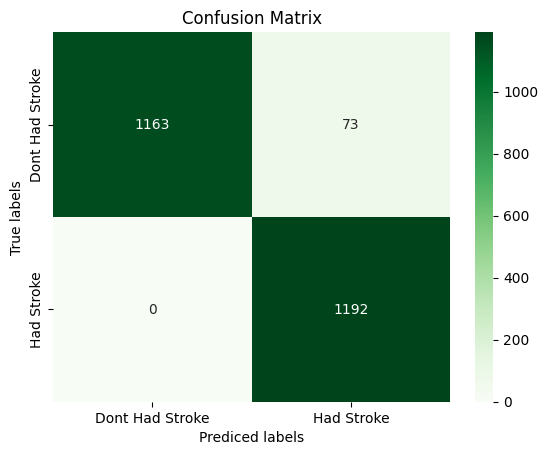

In [ ]:
plot_confusion_matrix(y_test_ros, y_pred_tree_ros)

###DecisionTreeClassifier Hyper Parameter Tuning with Min-Max Scaler

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree_minmax = DecisionTreeClassifier()
tree_cv_minmax = GridSearchCV(estimator=tree_minmax, cv=10, param_grid=parameters).fit(X_train_minmax, y_train_minmax)



print('Tuned hyper parameters : ', tree_cv_minmax.best_params_)
print('accuracy : ', tree_cv_minmax.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': 24, 'splitter': 'random'}
accuracy :  0.9711685433907655


In [ ]:
tree_minmax = DecisionTreeClassifier(**tree_cv_minmax.best_params_).fit(X_train_minmax, y_train_minmax)
y_pred_tree_minmax = tree_minmax.predict(X_test_minmax)

tree_score_minmax = round(tree_minmax.score(X_test_minmax, y_test_minmax), 3)
print('DecisionTreeClassifier Score : ', tree_score_minmax)

DecisionTreeClassifier Score :  0.971


In [ ]:
dtc_minmax = metrics.classification_report(y_test_minmax, y_pred_tree_minmax)
print(dtc_minmax)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1211
           1       0.94      1.00      0.97      1217

    accuracy                           0.97      2428
   macro avg       0.97      0.97      0.97      2428
weighted avg       0.97      0.97      0.97      2428



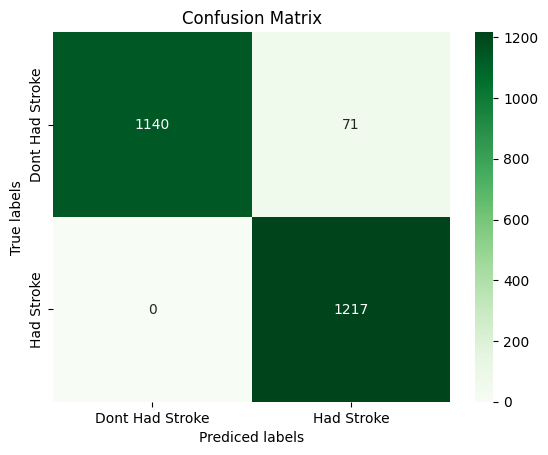

In [ ]:
plot_confusion_matrix(y_test_minmax, y_pred_tree_minmax)

###DecisionTreeClassifier Hyper Parameter Tuning with SMOTE

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train_SMOTE, y_train_SMOTE)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'random'}
accuracy :  0.9472817648743576


In [ ]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train_SMOTE, y_train_SMOTE)
y_pred_tree_SMOTE = tree.predict(X_test_SMOTE)

tree_score = round(tree.score(X_test_SMOTE, y_test_SMOTE), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.941


In [ ]:
dtc_SMOTE = metrics.classification_report(y_test_SMOTE, y_pred_tree_SMOTE)
print(dtc_SMOTE)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1211
           1       0.93      0.96      0.94      1217

    accuracy                           0.94      2428
   macro avg       0.94      0.94      0.94      2428
weighted avg       0.94      0.94      0.94      2428



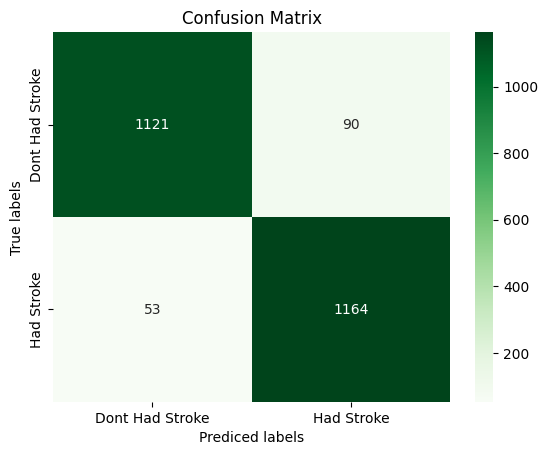

In [ ]:
plot_confusion_matrix(y_test_SMOTE, y_pred_tree_SMOTE)

##KNeighborsClassifier

###KNN Random Over Sampler

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}




knn_ros = KNeighborsClassifier()
knn_cv_ros = GridSearchCV(estimator=knn_ros, cv=10, param_grid=parameters).fit(X_train_ros, y_train_ros)



print('Tuned hyper parameters : ', knn_cv_ros.best_params_)
print('accuracy : ', knn_cv_ros.best_score_)

Tuned hyper parameters :  {'n_neighbors': 3, 'p': 2}
accuracy :  0.9415151720707277


In [ ]:
knn_ros = KNeighborsClassifier(**knn_cv_ros.best_params_).fit(X_train_ros, y_train_ros)
y_pred_knn_ros = knn_cv_ros.predict(X_test_ros)

knn_score_ros = round(knn_ros.score(X_test_ros, y_test_ros), 3)
print('KNeighborsClassifier Score :', knn_score_ros)

KNeighborsClassifier Score : 0.954


In [ ]:
cr_knn_ros = metrics.classification_report(y_test_ros, y_pred_knn_ros)
print(cr_knn_ros)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1236
           1       0.91      1.00      0.96      1192

    accuracy                           0.95      2428
   macro avg       0.96      0.96      0.95      2428
weighted avg       0.96      0.95      0.95      2428



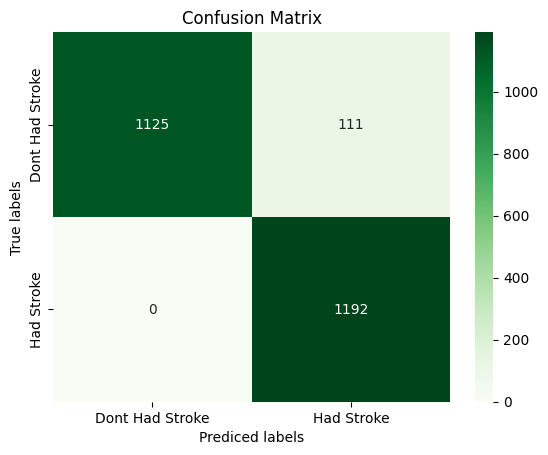

In [ ]:
plot_confusion_matrix(y_test_ros, y_pred_knn_ros)

###KNN Min Max Scaler

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

knn_minmax = KNeighborsClassifier()
knn_cv_minmax = GridSearchCV(estimator=knn_minmax, cv=10, param_grid=parameters).fit(X_train_minmax, y_train_minmax)


print('Tuned hyper parameters : ', knn_cv_minmax.best_params_)
print('accuracy : ', knn_cv_minmax.best_score_)

Tuned hyper parameters :  {'n_neighbors': 3, 'p': 3}
accuracy :  0.9448081068451438


In [ ]:
knn_minmax = KNeighborsClassifier(**knn_cv_minmax.best_params_).fit(X_train_minmax, y_train_minmax)
y_pred_knn_minmax = knn_cv_minmax.predict(X_test_minmax)

knn_score_minmax = round(knn_minmax.score(X_test_minmax, y_test_minmax), 3)
print('KNeighborsClassifier Score :', knn_score_minmax)

KNeighborsClassifier Score : 0.947


In [ ]:
cr_knn_minmax = metrics.classification_report(y_test_minmax, y_pred_knn_minmax)
print(cr_knn_minmax)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1211
           1       0.90      1.00      0.95      1217

    accuracy                           0.95      2428
   macro avg       0.95      0.95      0.95      2428
weighted avg       0.95      0.95      0.95      2428



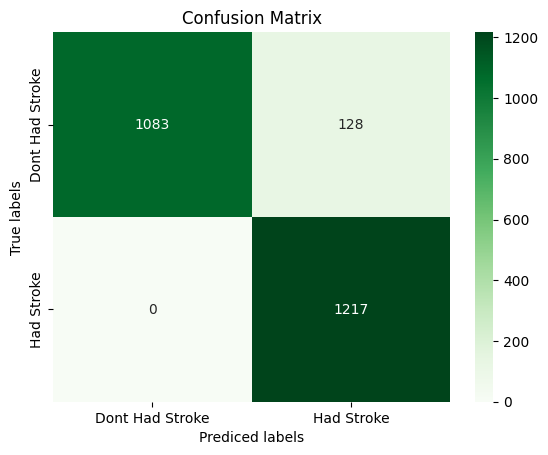

In [ ]:
plot_confusion_matrix(y_test_minmax, y_pred_knn_minmax)

###KNN SMOTE

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

knn_SMOTE = KNeighborsClassifier()
knn_cv_SMOTE = GridSearchCV(estimator=knn_SMOTE, cv=10, param_grid=parameters).fit(X_train_SMOTE, y_train_SMOTE)


print('Tuned hyper parameters : ', knn_cv_SMOTE.best_params_)
print('accuracy : ', knn_cv_SMOTE.best_score_)

Tuned hyper parameters :  {'n_neighbors': 3, 'p': 2}
accuracy :  0.9008752393011653


In [ ]:
knn_SMOTE = KNeighborsClassifier(**knn_cv_SMOTE.best_params_).fit(X_train_SMOTE, y_train_SMOTE)
y_pred_knn_SMOTE = knn_cv_SMOTE.predict(X_test_SMOTE)

knn_score_SMOTE = round(knn_SMOTE.score(X_test_SMOTE, y_test_SMOTE), 3)
print('KNeighborsClassifier Score :', knn_score_SMOTE)

KNeighborsClassifier Score : 0.897


In [ ]:
cr_knn_SMOTE = metrics.classification_report(y_test_SMOTE, y_pred_knn_SMOTE)
print(cr_knn_SMOTE)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1211
           1       0.84      0.98      0.90      1217

    accuracy                           0.90      2428
   macro avg       0.91      0.90      0.90      2428
weighted avg       0.91      0.90      0.90      2428



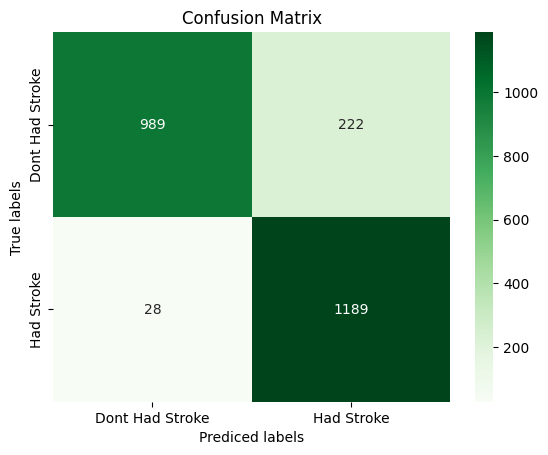

In [ ]:
plot_confusion_matrix(y_test_SMOTE, y_pred_knn_SMOTE)

#Results


###Table of Results

In [ ]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier_ROS','RandomForestClassifier_minmax','RandomForestClassifier_SMOTE',
                   'SVC_ROS','SVC_minmax','SVC_SMOTE',
                   'DecisionTreeClassifier_ROS', 'DecisionTreeClassifier_minmax','DecisionTreeClassifier_SMOTE',
                   'KNeighborsClassifier_ROS','KNeighborsClassifier_minmax','KNeighborsClassifier_SMOTE'],
    'Score' : [rfc_ros_score,rfc_minmax_score,rfc_SMOTE_score,
               svc_score_ros,svc_score_minmax,svc_score_SMOTE,
               tree_score_ros,tree_score_minmax,tree_score,
               knn_score_ros,knn_score_minmax,knn_score_SMOTE]

})

result

,Algorithm,Score
0,RandomForestClassifier_ROS,0.994234
1,RandomForestClassifier_minmax,0.988056
2,RandomForestClassifier_SMOTE,0.967051
3,SVC_ROS,0.701400
4,SVC_minmax,0.766063
5,SVC_SMOTE,0.756178
6,DecisionTreeClassifier_ROS,0.970000
7,DecisionTreeClassifier_minmax,0.971000
8,DecisionTreeClassifier_SMOTE,0.941000
9,KNeighborsClassifier_ROS,0.954000


###Graph of Results

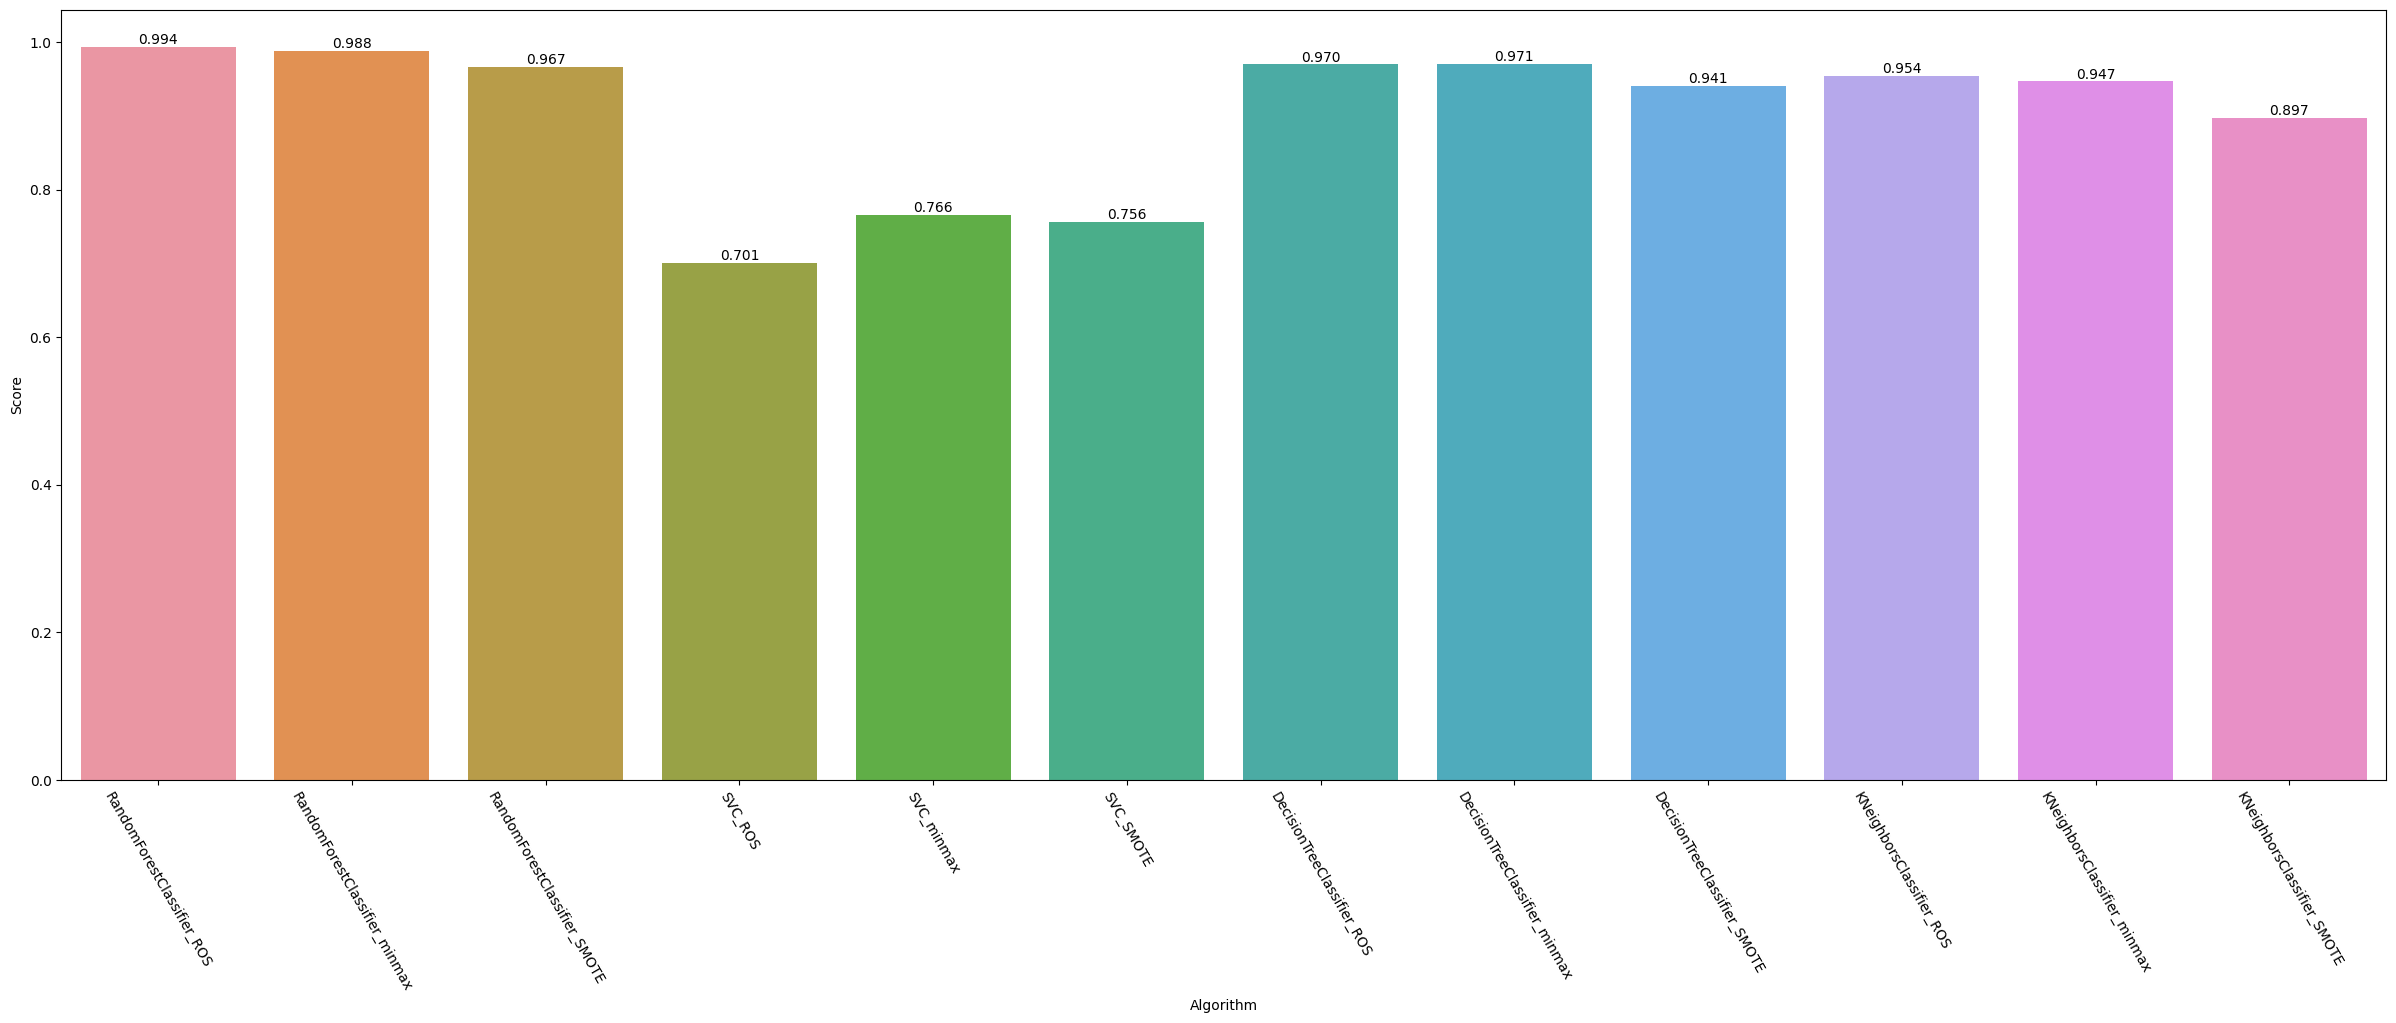

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)

plt.show()
